**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
pip install python-decouple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')
seaborn.set(font_scale=1)

from decouple import config
from sqlalchemy import create_engine, text

In [3]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

  # Datasets a utilizar en el practico
1.   Melbourne
2.   AirBnb


# 1. Melbourne

Definimos las columnas de interes de la base de datos de Melbourn, e importamos la base de datos.

In [4]:
interesting_cols_melb = [
  'Suburb', 'CouncilArea', 'Postcode', 'Regionname','YearBuilt', 'Rooms','BuildingArea',
  'Price', 'Landsize', 'Type',
  'Lattitude', 'Longtitude']
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv',
    usecols=interesting_cols_melb)
melb_df[:3]

,Suburb,Rooms,Type,Price,Postcode,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,2,h,1480000.0,3067.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan
1,Abbotsford,2,h,1035000.0,3067.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan
2,Abbotsford,3,h,1465000.0,3067.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan


# 2. AirBnb

Definimos las columnas de interes de la base de datos de Airbnb, e importamos la base de datos.

In [5]:
interesting_cols_airbnb = [
  'neighborhood', 'city', 'zipcode',
  'price', 'latitude', 'longitude']
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols_airbnb)
airbnb_df[:3]

# airbnb_df = pandas.read_csv(
#     'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
# airbnb_df.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,neighborhood,city,zipcode,latitude,longitude,price
0,Balwyn North,Manningham,3105,-37.772684,145.092133,60
1,Brunswick,Moreland,3057,-37.766505,144.980736,35
2,St Kilda,Port Phillip,3182,-37.859755,144.977369,159


Describimos los estadísticos para ambas bases de datos.

In [6]:
melb_df.describe()

,Rooms,Price,Postcode,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,13580.000000,1.358000e+04,13580.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,3105.301915,558.416127,151.967650,1964.684217,-37.809203,144.995216
std,0.955748,6.393107e+05,90.676964,3990.669241,541.014538,37.273762,0.079260,0.103916
min,1.000000,8.500000e+04,3000.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810
25%,2.000000,6.500000e+05,3044.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600
50%,3.000000,9.030000e+05,3084.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100
75%,3.000000,1.330000e+06,3148.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305
max,10.000000,9.000000e+06,3977.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350


In [7]:
airbnb_df.describe()

,latitude,longitude,price
count,22895.000000,22895.000000,22895.000000
mean,-37.826827,145.008457,148.004368
std,0.066747,0.127711,210.883253
min,-38.224427,144.484326,0.000000
25%,-37.852665,144.957692,71.000000
50%,-37.817855,144.978402,111.000000
75%,-37.803176,145.013441,165.000000
max,-37.482595,145.839127,12624.000000


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



Creamos la base de datos utilizando la librería SQLalchemy

In [8]:
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

Ingestamos los datos provistos

In [9]:
melb_df['Postcode'] = pandas.to_numeric(melb_df.Postcode, errors='coerce')
melb_df.to_sql('melb_sql', con=engine, if_exists="replace")

2022-05-26 21:54:39,779 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_sql")
2022-05-26 21:54:39,791 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-26 21:54:39,798 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb_sql")
2022-05-26 21:54:39,806 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-26 21:54:39,818 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-26 21:54:39,832 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb_sql (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Postcode" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT
)


2022-05-26 21:54:39,834 INFO sqlalchemy.engine.Engine [no key 0.00223s] ()
2022-05-26 21:54:39,862 INFO sqlalchemy.engine.Engine CREATE INDEX ix_melb_sql_index ON melb_sql ("index")
2022-05-26 21:54:39,864 INFO sqlalchemy.engine.Engine [no key 0.00167s] ()
2022-05-26 21:54:39,877

In [10]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')
airbnb_df.to_sql('airbnb_sql', con=engine, if_exists="replace")

2022-05-26 21:54:40,886 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_sql")
2022-05-26 21:54:40,890 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-26 21:54:40,894 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_sql")
2022-05-26 21:54:40,897 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-26 21:54:40,903 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-26 21:54:40,922 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_sql (
	"index" BIGINT, 
	neighborhood TEXT, 
	city TEXT, 
	zipcode FLOAT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT
)


2022-05-26 21:54:40,927 INFO sqlalchemy.engine.Engine [no key 0.00654s] ()
2022-05-26 21:54:40,959 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_sql_index ON airbnb_sql ("index")
2022-05-26 21:54:40,960 INFO sqlalchemy.engine.Engine [no key 0.00172s] ()
2022-05-26 21:54:40,977 INFO sqlalchemy.engine.Engine COMMIT
2022-05-26 21:54:41,008 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-26 21:5

Hacemos las transformaciones necesarias para realizar la combinacion de los dataset a través de la columna zipcode. 

In [11]:
relevant_cols = ['price', 'zipcode']

airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg(airbnb_record_count=('price', 'count'),
       airbnb_price_mean=('price', 'mean'))\
  .reset_index()

airbnb_price_by_zipcode['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')
airbnb_price_by_zipcode.dropna(inplace=True)
airbnb_price_by_zipcode.reset_index()

airbnb_price_by_zipcode[:10]


,zipcode,airbnb_record_count,airbnb_price_mean
0,3105.0,1,40.000000
1,3057.0,1,50.000000
2,3182.0,1,104.000000
3,3071.0,3367,150.504307
4,3183.0,2,132.500000
5,3806.0,197,200.979695
6,3073.0,267,130.205993
7,3002.0,728,158.271978
8,3166.0,1268,188.851735
9,3199.0,616,177.011364


Ingestamos una nueva tabla con las transformaciones realizadas previamente.

In [12]:
airbnb_price_by_zipcode.to_sql('airbnb_zip_sql', con=engine, if_exists="replace")

2022-05-26 21:54:42,227 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_zip_sql")
2022-05-26 21:54:42,237 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-26 21:54:42,243 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_zip_sql")
2022-05-26 21:54:42,248 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-26 21:54:42,256 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-26 21:54:42,262 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_zip_sql (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_price_mean FLOAT
)


2022-05-26 21:54:42,268 INFO sqlalchemy.engine.Engine [no key 0.00676s] ()
2022-05-26 21:54:42,281 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_zip_sql_index ON airbnb_zip_sql ("index")
2022-05-26 21:54:42,283 INFO sqlalchemy.engine.Engine [no key 0.00166s] ()
2022-05-26 21:54:42,297 INFO sqlalchemy.engine.Engine COMMIT
2022-05-26 21:54:42,301 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-26 21:54:42,310 I

# Cantidad de registros por ciudad
1.   Melbourne
2.   AirBnb


# 1. Melbourne

Query en melb_df de registros agrupados por ciudad

In [13]:
chart_data = pandas.read_sql_query("SELECT CouncilArea,COUNT(*) AS `Frequency` FROM melb_sql GROUP BY CouncilArea", engine)
ordered_result = chart_data.sort_values('Frequency', ascending=False).reset_index(drop=True)
ordered_result

2022-05-26 21:54:42,342 INFO sqlalchemy.engine.Engine SELECT CouncilArea,COUNT(*) AS `Frequency` FROM melb_sql GROUP BY CouncilArea
2022-05-26 21:54:42,347 INFO sqlalchemy.engine.Engine [raw sql] ()


,CouncilArea,Frequency
0,None,1369
1,Moreland,1163
2,Boroondara,1160
3,Moonee Valley,997
4,Darebin,934
5,Glen Eira,848
6,Stonnington,719
7,Maribyrnong,692
8,Yarra,647
9,Port Phillip,628


Mostramos a través de un grafico, el resultado obtenido en la query anterior.

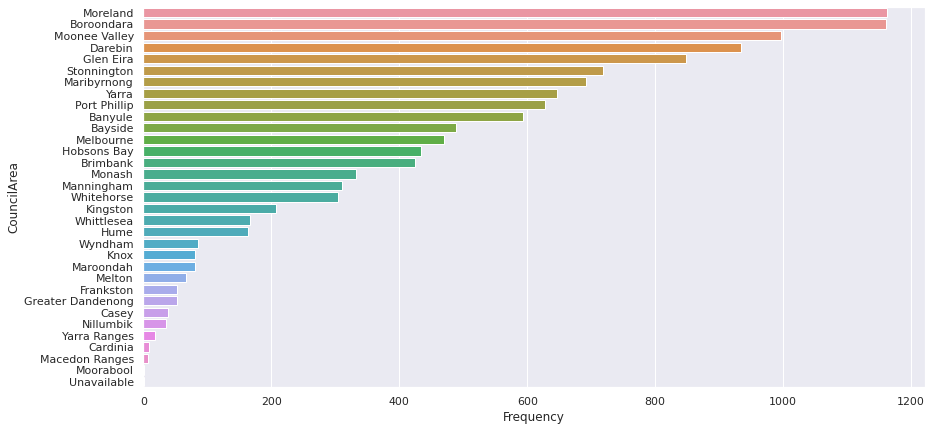

In [14]:
seaborn.set(rc={'figure.figsize':(14,7)})
chart_01 = seaborn.barplot(data = ordered_result, y = "CouncilArea", x='Frequency')

Query en melb_df de registros agrupados por barrio

In [15]:
chart_data = pandas.read_sql_query("SELECT Suburb,COUNT(*) AS `Frequency` FROM melb_sql GROUP BY Suburb", engine)
ordered_result_melb1 = chart_data.sort_values('Frequency', ascending=False).reset_index(drop=True)
ordered_result_melb1

2022-05-26 21:54:43,797 INFO sqlalchemy.engine.Engine SELECT Suburb,COUNT(*) AS `Frequency` FROM melb_sql GROUP BY Suburb
2022-05-26 21:54:43,803 INFO sqlalchemy.engine.Engine [raw sql] ()


,Suburb,Frequency
0,Reservoir,359
1,Richmond,260
2,Bentleigh East,249
3,Preston,239
4,Brunswick,222
...,...,...
309,Attwood,1
310,Beaconsfield Upper,1
311,Bacchus Marsh,1
312,Sandhurst,1


# 2. AirBnb

Query en airbnb_df de registros agrupados por ciudad

In [16]:
chart_data = pandas.read_sql_query("SELECT city,COUNT(*) AS `Frequency` FROM airbnb_sql GROUP BY city", engine)
ordered_result_airbnb1 = chart_data.sort_values('Frequency', ascending=False).reset_index(drop=True)
ordered_result_airbnb1

2022-05-26 21:54:43,856 INFO sqlalchemy.engine.Engine SELECT city,COUNT(*) AS `Frequency` FROM airbnb_sql GROUP BY city
2022-05-26 21:54:43,862 INFO sqlalchemy.engine.Engine [raw sql] ()


,city,Frequency
0,Melbourne,7368
1,Port Phillip,2808
2,Yarra,2049
3,Stonnington,1621
4,Moreland,967
5,Yarra Ranges,771
6,Darebin,698
7,Boroondara,664
8,Glen Eira,631
9,Whitehorse,614


Mostramos a través de un grafico, el resultado obtenido en la query anterior.

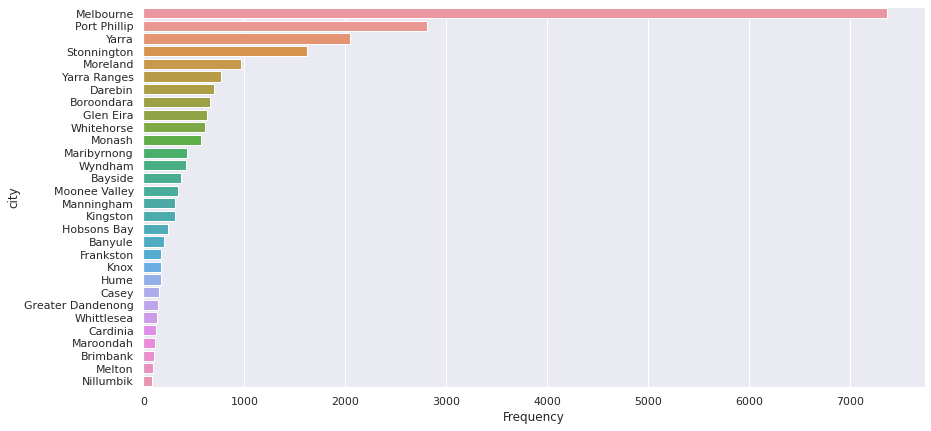

In [17]:
seaborn.set(rc={'figure.figsize':(14,7)})
chart1 = seaborn.barplot(data = ordered_result_airbnb1, y = 'city', x='Frequency')

Query en airbnb_df de registros agrupados por barrio

In [18]:
chart_data = pandas.read_sql_query("SELECT neighborhood,COUNT(*) AS `frequency` FROM airbnb_sql GROUP BY neighborhood", engine)
ordered_result1 = chart_data.sort_values('frequency', ascending=False).reset_index(drop=True)
ordered_result1

2022-05-26 21:54:44,953 INFO sqlalchemy.engine.Engine SELECT neighborhood,COUNT(*) AS `frequency` FROM airbnb_sql GROUP BY neighborhood
2022-05-26 21:54:44,969 INFO sqlalchemy.engine.Engine [raw sql] ()


,neighborhood,frequency
0,None,5813
1,Central Business District,3726
2,Southbank,1248
3,St Kilda,1085
4,South Yarra,1053
5,Brunswick,728
6,Carlton,585
7,Docklands,576
8,Richmond,547
9,Fitzroy,381


Query para conteo de registros por Barrio y Ciudad

In [19]:
filtered_data_2 = pandas.read_sql_query("SELECT CouncilArea,Suburb,COUNT(CouncilArea) AS `CouncilArea Frequency` FROM melb_sql GROUP BY  CouncilArea", engine)
ordered_result_2 = filtered_data_2.sort_values('CouncilArea Frequency', ascending=False).reset_index(drop=True)
ordered_result_2

2022-05-26 21:54:45,178 INFO sqlalchemy.engine.Engine SELECT CouncilArea,Suburb,COUNT(CouncilArea) AS `CouncilArea Frequency` FROM melb_sql GROUP BY  CouncilArea
2022-05-26 21:54:45,186 INFO sqlalchemy.engine.Engine [raw sql] ()


,CouncilArea,Suburb,CouncilArea Frequency
0,Moreland,Pascoe Vale,1163
1,Boroondara,Kew East,1160
2,Moonee Valley,Moonee Ponds,997
3,Darebin,Thornbury,934
4,Glen Eira,Murrumbeena,848
5,Stonnington,Windsor,719
6,Maribyrnong,Yarraville,692
7,Yarra,Richmond,647
8,Port Phillip,St Kilda,628
9,Banyule,Watsonia North,594


# Combinacion de dataset

In [20]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Melbourne unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Melbourne unique zipcodes 198
Common zipcodes 191


In [21]:
intersection

array([3000., 3002., 3003., 3006., 3008., 3011., 3012., 3013., 3015.,
       3016., 3018., 3019., 3020., 3021., 3023., 3024., 3025., 3027.,
       3028., 3029., 3030., 3031., 3032., 3033., 3034., 3036., 3037.,
       3038., 3039., 3040., 3041., 3042., 3043., 3044., 3046., 3047.,
       3048., 3049., 3051., 3052., 3053., 3054., 3055., 3056., 3057.,
       3058., 3059., 3060., 3064., 3065., 3066., 3067., 3068., 3070.,
       3071., 3072., 3073., 3074., 3075., 3076., 3078., 3079., 3081.,
       3082., 3083., 3084., 3085., 3087., 3088., 3089., 3093., 3094.,
       3095., 3099., 3101., 3102., 3103., 3104., 3105., 3106., 3107.,
       3108., 3109., 3111., 3113., 3115., 3116., 3121., 3122., 3123.,
       3124., 3125., 3126., 3127., 3128., 3130., 3131., 3132., 3133.,
       3134., 3135., 3136., 3137., 3138., 3141., 3142., 3143., 3144.,
       3145., 3146., 3147., 3148., 3149., 3150., 3151., 3152., 3153.,
       3154., 3155., 3156., 3158., 3161., 3162., 3163., 3165., 3166.,
       3167., 3168.,

In [22]:
import plotly.express as px
data = melb_df.sample(300)
fig = px.scatter_geo(
    data, lat=data.Lattitude, lon=data.Longtitude, color=data.Type)
fig.update_geos(fitbounds="locations")
fig.show()

In [23]:
# First we filter out the columns we want, and then we only aggregate
# those. Be careful to include the grouping column as well.
# airbnb_df[['price'] + ['zipcode']]\
#   .groupby('zipcode').mean().reset_index()[:20]
melb_price_by_zipcode = melb_df[interesting_cols_melb].groupby('Postcode')\
  .agg(melb_record_count=('Price', 'count'),
       melb_price_mean=('Price', 'mean'))\
  .reset_index()
airbnb_price_by_zipcode = airbnb_df[interesting_cols_airbnb].groupby('zipcode')\
  .agg(airbnb_record_count=('price', 'count'),
       airbnb_price_mean=('price', 'mean'))\
  .reset_index()

merged_sales_df = melb_price_by_zipcode.merge(
    airbnb_price_by_zipcode, how='inner',
    left_on='Postcode', right_on='zipcode'
)

merged_sales_df

,Postcode,melb_record_count,melb_price_mean,zipcode,airbnb_record_count,airbnb_price_mean
0,3000.0,46,6.169457e+05,3000.0,3367,150.504307
1,3002.0,22,1.440227e+06,3002.0,197,200.979695
2,3003.0,31,9.945161e+05,3003.0,267,130.205993
3,3006.0,41,6.340122e+05,3006.0,1268,188.851735
4,3008.0,3,8.433333e+05,3008.0,616,177.011364
...,...,...,...,...,...,...
186,3809.0,1,5.590000e+05,3809.0,14,76.214286
187,3810.0,3,4.963333e+05,3810.0,22,94.954545
188,3910.0,6,6.545833e+05,3910.0,8,118.000000
189,3976.0,4,5.520000e+05,3976.0,2,55.000000


# Ejercicio 2


1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

# Seleccionamos la subpoblacion de columnas para predecir el valor de las propiedades

Nos enfocaremos en aquellas que hacen referencia a la ubicacion del inmueble, su superficie, y tipologia de la vivienda

In [24]:
#limpieza melb
melb_filtered = melb_df[melb_df.Price>100000] 
melb_filtered = melb_filtered[melb_filtered.Price<1500000]

#limpieza airbnb
airbnb_filtered = airbnb_price_by_zipcode[airbnb_price_by_zipcode.airbnb_record_count>20]

merged_sales_df_tp1 = melb_filtered.merge(
    airbnb_filtered, how='left',
    left_on='Postcode', right_on='zipcode'
)

In [25]:
merged_sales_df_tp1

,Suburb,Rooms,Type,Price,Postcode,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_record_count,airbnb_price_mean
0,Abbotsford,2,h,1480000.0,3067.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,258.0,130.624031
1,Abbotsford,2,h,1035000.0,3067.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,258.0,130.624031
2,Abbotsford,3,h,1465000.0,3067.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3067.0,258.0,130.624031
3,Abbotsford,3,h,850000.0,3067.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,3067.0,258.0,130.624031
4,Abbotsford,2,h,941000.0,3067.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,3067.0,258.0,130.624031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036,Westmeadows,3,h,582000.0,3049.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,3049.0,21.0,92.285714
11037,Wheelers Hill,4,h,1245000.0,3150.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,3150.0,189.0,124.026455
11038,Williamstown,3,h,1031000.0,3016.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,3016.0,74.0,191.094595
11039,Williamstown,3,h,1170000.0,3016.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,3016.0,74.0,191.094595


# Seleccionamos otras variables que podrian servir para la combinacion de datasets

1. Council Area & City
2. Suburb & Neighborhood
3. Lattitude & Latitude
4. Longitude & Longitude

La eleccion de estas variables se debe a que se encuentran presentes en ambas bases de datos, permitiendo la agregacion de informacion relevante para la prediccion de precio. 

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [26]:
merged_sales_df_tp1.to_csv('merged_sales_df_tp1.csv', index=None)
from google.colab import files
files.download('merged_sales_df_tp1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)